* Radif Ramadan

* Data Science / JCSDOL-014

* Modul 3 - Day 33

---
---

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
df = sns.load_dataset('mpg')
df.dropna(inplace = True)
df.reset_index(drop = True)
display(df)
df.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Independen variabel : `Horsepower`**

**Dependen variabel : `mpg`**

In [3]:
# Korelasi antara Horse Power dan MPG
correlation = df['horsepower'].corr(df['mpg'])
print(f'Korelasi antara Horse Power dan MPG: {correlation:.2f}')

Korelasi antara Horse Power dan MPG: -0.78


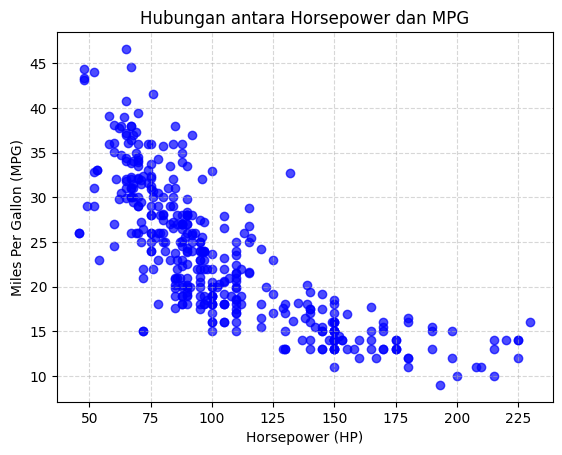

In [4]:
plt.scatter(df.horsepower, df.mpg, alpha=0.7, color='blue')
plt.xlabel("Horsepower (HP)")
plt.ylabel("Miles Per Gallon (MPG)")
plt.title("Hubungan antara Horsepower dan MPG")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

##### • Korelasi menunjukkan nilai **negatif** sebesar -0.78 yang berarti memiliki **hubungan yang berkebalikan (negatif)** yang ditunjukkan juga pada Scatter Plot dimana ketika Horse Power Tinggi, maka MPG cenderung rendah atau sebaliknya (MPG tinggi, maka Horse Power cenderung rendah). Hal ini menandakan bahwa mobil dengan **horsepower tinggi cenderung memiliki efisiensi bahan bakar yang lebih rendah**.

In [5]:
model = LinearRegression()
X = df[['horsepower']]
y = df.mpg

model.fit(X, y)

intercept = model.intercept_
slope = model.coef_[0]

print(f'Intercept: {intercept:.2f}')
print(f'Slope: {slope:.2f}')

Intercept: 39.94
Slope: -0.16


**Y = a + bx --> a (Intercept), b (Slope)**

##### • Hasil regresi menunjukkan bahwa terdapat hubungan negatif antara horsepower dan MPG, **di mana setiap peningkatan 1 HP mengurangi efisiensi bahan bakar sebesar 0.16 MPG** (Slope). Dan dengan intercept 39.94, model membuktikan bahwa **mobil dengan tenaga lebih tinggi cenderung akan mengkonsumsi bahan bakar yang lebih boros**. 


In [ ]:
y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = root_mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')
print(f'R^2 Score: {r2:.2f}')

Mean Absolute Error (MAE): 3.83
Mean Squared Error (MSE): 23.94
Root Mean Squared Error (RMSE): 4.89
Mean Absolute Percentage Error (MAPE): 17.59%
R^2 Score: 0.61


* `Mean Absolute Error (MAE)` --> menunjukkan bahwa rata-rata kesalahan prediksi meleset sekitar 3.83 MPG
* `Mean Squared Error (MSE)` --> menunjukkan bahwa rata-rata kesalahan prediksi meleset sekitar 23.94 (satuan dalam MPG²)
* `Root Mean Squared Error (RMSE)` --> menunjukkan rata-rata prediksi model meleset sekitar 4.89 MPG
* `Mean Absolute Percentage Error (MAPE)` --> menunjukkan rata-rata prediksi memiliki error sebesar 17.59% dari nilai aktualnya
* `R^2 Score` --> menunjukkan 61% (0.61) variabilitas MPG dapat dijelaskan oleh Horsepower. Sisanya 36% bisa disebabkan oleh faktor lain

`Kesimpulan:` Model regresi linear yang menghubungkan Horsepower dengan MPG menunjukkan bahwa Horsepower cukup menjelaskan sebagian besar variabilitas dalam konsumsi bahan bakar, meskipun error yang lainnya (MAE,MSE,RMSR,MAPE) masih mengindikasikan bahwa model ini dapat lebih akurat dengan mempertimbangkan faktor lain yang mempengaruhi MPG.

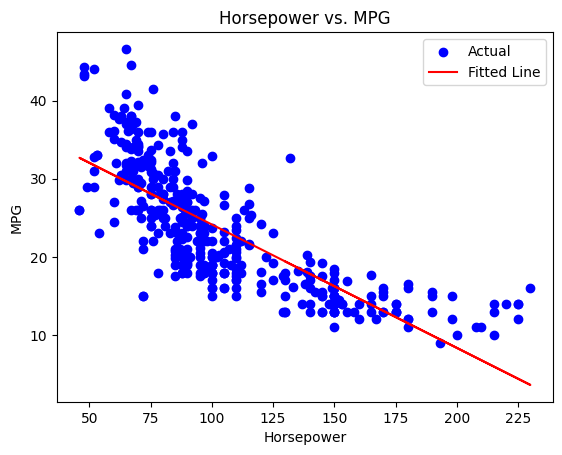

In [7]:
# Plot hasil regresi linier
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs. MPG')
plt.legend()
plt.show()